# Vamos ver, para diversos indices de ações, quais são os dias do mês que mais possuem retornos positivos

# Importamos os módulos necessários:

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from pandas_datareader import data as dt 

# Definimos a série de tickers que analisaremos: 

In [2]:
tickers = ['^BVSP','^GSPC','^N225','^TWII','^FCHI','^GDAXI']

# Plotamos para cada ticker o % de retornos positivos em cada dia do mês: 

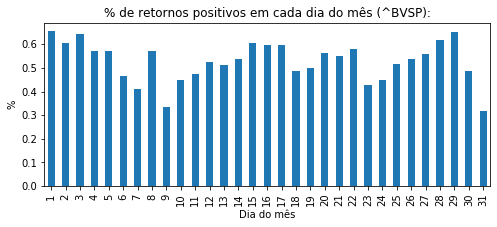

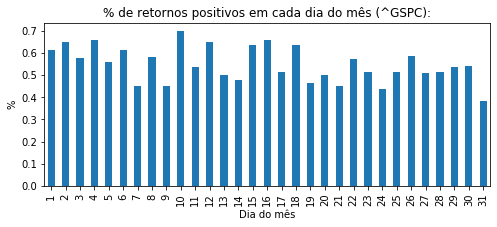

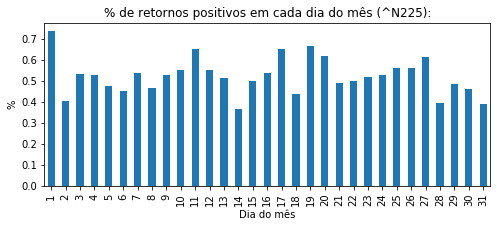

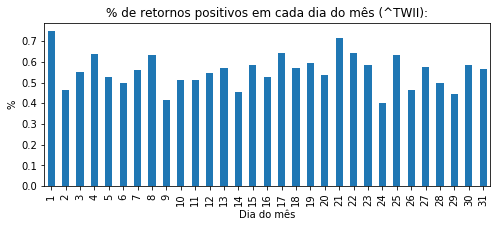

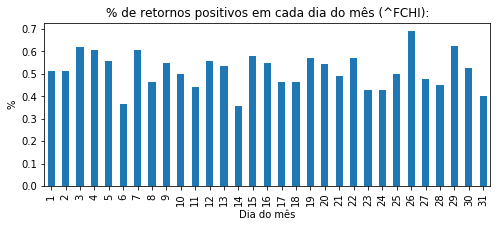

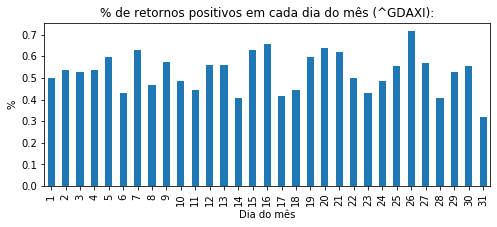

In [4]:
#Loop para iterar em cada ticker da lista de tickers: 
for i in tickers: 
    data=dt.DataReader(i,data_source='yahoo')
    data['Retorno']=data['Adj Close'].pct_change()
    #Criamos uma coluna aonde inserimos 1 se o retorno do dia é positivo e 0 caso contrário:  
    data['Positivo/Negativo']=(data['Retorno']>0).astype(int)
    #Criamos uma coluna com o número do dia do mês: 
    data['Dia do mês']=data.index.day
    #Agrupamos por dia do mês:
    data_filter = data.groupby('Dia do mês')
    #Calculamos o % de retornos positivos em cada dia: 
    data_filter.mean()['Positivo/Negativo'].plot.bar(figsize=(8,3))
    #Plotamos os resultados:
    plt.title('% de retornos positivos em cada dia do mês '+'('+str(i)+')'+':',fontsize=12)
    plt.ylabel('%')
    plt.show()